# Importing libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Part 1

Question 1:
Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
#creating path
pathk=r'/Volumes/Macintosh HD - Data/Data analysis 4 onwards/Instacart Basket Analysis-Python/02 Data'

In [4]:
#importing complete pickle data
df_fin_data=pd.read_pickle(os.path.join(pathk,'Prepared Data','final_data.pkl'))

In [5]:
df_fin_data.shape

(32404859, 29)

In [6]:
#checking first name and last name columns. They would be dropped to protect privacy

df_fin_data.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'averge_price',
       'spend_flag', 'order_frequency', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'dependents_nbr',
       'marital_status', 'income', '_merge'],
      dtype='object')

In [7]:
#dropping columns

df_fin_data = df_fin_data.drop(columns = ['first_name'])
df_fin_data = df_fin_data.drop(columns = ['last_name'])

In [8]:
df_fin_data.head(10)

,order_id,user_id,order_number,Order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,frequency_flag,gender,state,age,date_joined,dependents_nbr,marital_status,income,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## Question 2:
Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The data definatley contain personal information like name , state, gender , age ,marital status and income. This is PII data.
1. this data is for United states and they do not have the regualtion agaist privacy.
2. This is sources from instacart and the condition for the usage is that it can not be used for commericial uage and there are terms and conditions. As we are using this for educational purposes, this should be okay.
3. If this assignement was for the company, the data use of some data would be ageed with customer to be used for analytics.

## Question 3:
The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
#finding the states in our data frame
x=np.unique(df_fin_data['state'])

In [10]:
x

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [11]:
#updating north east
df_fin_data.loc[df_fin_data['state'].isin(['New York','Connecticut','Maine','New Hampshire',
       'New Jersey','Pennsylvania','Vermont','Massachusetts','Rhode Island']), 'region'] = 'North-East'

In [12]:
#updating mid-west
df_fin_data.loc[df_fin_data['state'].isin(['Illinois', 'Indiana','Iowa','Kansas','Michigan', 'Minnesota','Missouri',
                                           'Nebraska','North Dakota','Ohio','South Dakota','Wisconsin']), 'region'] = 'Mid-West'

In [13]:
#updating south
df_fin_data.loc[df_fin_data['state'].isin(['Alabama','Arkansas','Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Kentucky', 'Louisiana','Maryland','Mississippi','North Carolina','Tennessee',
       'Texas','Virginia', 'West Virginia','South Carolina','Oklahoma']), 'region'] = 'South'

In [14]:
#updating west
df_fin_data.loc[df_fin_data['state'].isin(['Alaska', 'Arizona','California','Hawaii', 'Idaho','Oregon','New Mexico', 
       'Colorado','Nevada','Washington','Wyoming','Montana', 'Utah']), 'region'] = 'West'

In [15]:
#checking count and any missing state
df_fin_data['region'].value_counts(dropna=False)

South         10791885
West           8292913
Mid-West       7597325
North-East     5722736
Name: region, dtype: int64

In [16]:
df_fin_data.head(10)

,order_id,user_id,order_number,Order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,dependents_nbr,marital_status,income,_merge,region
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [17]:
pd.options.display.max_rows = None

In [18]:
df_fin_data.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'averge_price',
       'spend_flag', 'order_frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'dependents_nbr', 'marital_status', 'income',
       '_merge', 'region'],
      dtype='object')

In [19]:
df_fin_data['spend_flag'].value_counts(dropna=False)

Low Spender     31770614
High Spender      634245
Name: spend_flag, dtype: int64

In [20]:
#spending habits across diffenrent regions among different spendin habits
pd.crosstab(df_fin_data['spend_flag'], df_fin_data['region'])

region,Mid-West,North-East,South,West
spend_flag,,,,
High Spender,155975,108225,209691,160354
Low Spender,7441350,5614511,10582194,8132559


## Question 4
The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

We already have max_order column with the number of orders by each customer.
The same flag can be used to add exclusion flag.

In [20]:
# checking if max_order can be used for customer activity as well.
df_fin_data.loc[:10,['user_id','max_order']]

,user_id,max_order
0,1,10
1,1,10
2,1,10
3,1,10
4,1,10
5,1,10
6,1,10
7,1,10
8,1,10
9,1,10


In [21]:
#creating activity flags
df_fin_data.loc[df_fin_data['max_order']<5, 'activity_flag'] = 'low_activity_customer'
df_fin_data.loc[df_fin_data['max_order']>=5, 'activity_flag'] = 'normal_activity_customer'

In [22]:
df_fin_data['activity_flag'].value_counts(dropna=False)

normal_activity_customer    30964564
low_activity_customer        1440295
Name: activity_flag, dtype: int64

In [23]:
#creating normla activity customer data frame for further use
df_ex_data=df_fin_data[df_fin_data['activity_flag']=='normal_activity_customer']

In [24]:
#exporting normal acivity customer
df_ex_data.to_pickle(os.path.join(pathk,'Prepared Data','normal_act_data.pkl'))

In [25]:
#creating low activity customer data frame for further use
df_low_ex_data=df_fin_data[df_fin_data['activity_flag']=='low_activity_customer']

In [26]:
#exporting low acivity customer
df_low_ex_data.to_pickle(os.path.join(pathk,'Prepared Data','low_act_data.pkl'))

In [27]:
df_ex_data.shape

(30964564, 29)

In [28]:
df_low_ex_data.shape

(1440295, 29)

## Question 5:
The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for 
different products and are, thus, curious about customer profiling in their database. Create a profiling 
variable based on age, income, certain goods in the “department_id” column, and number of dependents.
You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way 
they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you 
to the profile “Single adult” or “Young parent.”)

In [29]:
#checking all posible columns to create the profiles
df_ex_data.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'averge_price',
       'spend_flag', 'order_frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'dependents_nbr', 'marital_status', 'income',
       '_merge', 'region', 'activity_flag'],
      dtype='object')

In [30]:
df_ex_data.head(10)

,order_id,user_id,order_number,Order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,dependents_nbr,marital_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,normal_activity_customer


In [31]:
 #changing format when describe is used
pd.set_option('float_format', '{:f}'.format)

In [32]:
df_ex_data['age'].describe()

count   30964564.000000
mean          49.468026
std           18.485279
min           18.000000
25%           33.000000
50%           49.000000
75%           65.000000
max           81.000000
Name: age, dtype: float64

In [34]:
df_ex_data[[ 'user_id','Order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
    'reordered', 'product_name',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'averge_price',
       'spend_flag','frequency_flag','gender', 'age', 'dependents_nbr',
       'marital_status', 'income', 'region', 'activity_flag' ]].head(100)

,user_id,Order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,prices,max_order,...,averge_price,spend_flag,frequency_flag,gender,age,dependents_nbr,marital_status,income,region,activity_flag
0,1,2,8,7.000000,196,0,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
1,1,3,7,15.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
2,1,3,12,21.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
3,1,4,7,29.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
4,1,4,15,28.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
5,1,2,7,19.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
6,1,1,9,20.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
7,1,1,14,14.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
8,1,1,16,0.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer
9,1,4,8,30.000000,196,1,Soda,7,9.000000,10,...,6.367797,Low Spender,Regular customer,Female,31,3,married,40423,South,normal_activity_customer


In [35]:
#importing department_ids
df_dep=pd.read_csv(os.path.join(pathk,'Prepared Data','department_wrangled.csv'),index_col=False)

In [36]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
#renaming unnamed column to department_id
df_dep.rename(columns={'Unnamed: 0': 'department_id'},inplace=True)

In [36]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Here i reaslised i am missing busiest and price range flags created in 4.7. Hence I am re-creating it on my data frame to use them in profiling and visualizations.

In [38]:
#Assigning price range flags

df_ex_data.loc[df_ex_data['prices'] > 15, 'price_range_loc'] = 'High-range product'
df_ex_data.loc[(df_ex_data['prices'] <= 15) & (df_ex_data['prices'] > 5), 'averge_price'] = 'Mid-range product' 
df_ex_data.loc[df_ex_data['prices'] <= 5, 'price_range_loc'] = 'Low-range product'


/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/404897031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data.loc[df_ex_data['prices'] > 15, 'price_range_loc'] = 'High-range product'
/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/404897031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data.loc[(df_ex_data['prices'] <= 15) & (df_ex_data['prices'] > 5), 'averge_price'] = 'Mid-range product'


In [39]:
df_ex_data['price_range_loc'].value_counts(dropna=False)

NaN                   20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

In [40]:
#busiest days flag assignment

df_ex_data.loc[(df_ex_data['Order_day_of_the_week'] ==1) | (df_ex_data['Order_day_of_the_week'] ==0), 'busiest_days'] = 'Busiest days'
df_ex_data.loc[(df_ex_data['Order_day_of_the_week'] ==3) | (df_ex_data['Order_day_of_the_week'] ==4), 'busiest_days'] = 'slowest days'
df_ex_data.loc[(df_ex_data['Order_day_of_the_week'] ==2) | (df_ex_data['Order_day_of_the_week'] ==5)| (df_ex_data['Order_day_of_the_week'] ==6), 
               'busiest_days'] = 'Regular days'


/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/201285356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data.loc[(df_ex_data['Order_day_of_the_week'] ==1) | (df_ex_data['Order_day_of_the_week'] ==0), 'busiest_days'] = 'Busiest days'


In [41]:
df_ex_data['busiest_days'].value_counts(dropna=False)

Regular days    12349739
Busiest days    11320296
slowest days     7294529
Name: busiest_days, dtype: int64

In [42]:
#busiest period of the day flag
Orders_period = []

for x in df_ex_data["order_hour_of_day"]:
  if (x >= 10) & (x <= 15):
    Orders_period.append("Most Orders")
  elif (x >=0) & (x <= 5):
    Orders_period.append("Fewest orders")
  else:
    Orders_period.append("Average orders")

In [43]:
df_ex_data['busiest_hours']=Orders_period

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/1602245746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data['busiest_hours']=Orders_period


In [44]:
df_ex_data['busiest_hours'].value_counts(dropna=False)

Most Orders       15403564
Average orders    14993669
Fewest orders       567331
Name: busiest_hours, dtype: int64

In [45]:
df_ex_data.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'averge_price',
       'spend_flag', 'order_frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'dependents_nbr', 'marital_status', 'income',
       '_merge', 'region', 'activity_flag', 'price_range_loc', 'busiest_days',
       'busiest_hours'],
      dtype='object')

In [46]:
df_ex_data['marital_status'].value_counts(dropna=False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

# Profiling and flags

No we have different flags that we can use for visualisation
1. busiest_day: 2-high order days, 2-low order days, rest regular days
2. busiest_hours: 10 AM to 3 PM -most order period , 12 AM to 5 AM -fewest order period , rest -average orders
3. loyalty_flag :>40 order- loyal customer, 11 to 39 orders- regular customer,<=10 orders - New customer
4. spend_flag : average_price>=10 - high spender,esle low spender
5. frequency_flag:order frequency >20 - non-frequenct customer , between 10 to 20 -regular customer , less than 10 - frequent customer
6. price_range_loc: price >15 - high range , 15 to >5 - mid range product , <= 5 -low range

Customer profiling flags. these are created based on min, max and median
1. age profile : 18 to 30 :young age, 31 to 55- middle-age, 55+ - old age
2. income profile : 25K to 100 K - 'low- income' ,100 K to 250 K -midium income, 250 K to 400K - upper medium , 400 K    + -high income
3. dependents profile : 0- single , 1 to 2 - small family, 3 - medium family

In [47]:
#age profiles
df_ex_data.loc[df_ex_data['age']<=30, 'age_profile'] = 'Young-adult'
df_ex_data.loc[(df_ex_data['age']>30) & (df_ex_data['age']<=55), 'age_profile'] = 'Middle age-adult'
df_ex_data.loc[df_ex_data['age']> 55, 'age_profile'] = 'Old age-adult'

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/1141724367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data.loc[df_ex_data['age']<=30, 'age_profile'] = 'Young-adult'


In [48]:
df_ex_data['age_profile'].value_counts(dropna=False)

Old age-adult       12508298
Middle age-adult    12152026
Young-adult          6304240
Name: age_profile, dtype: int64

In [49]:
#income profiles
df_ex_data.loc[df_ex_data['income']<=100000, 'income_profile'] = 'Low income'
df_ex_data.loc[(df_ex_data['income']>100000) & (df_ex_data['income']<=200000), 'income_profile'] = 'Medium income'
df_ex_data.loc[(df_ex_data['income']> 200000) & (df_ex_data['income']<=400000), 'income_profile'] = 'Uppper medium income'
df_ex_data.loc[df_ex_data['income']>400000, 'income_profile'] = 'High income'

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/1171918271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data.loc[df_ex_data['income']<=100000, 'income_profile'] = 'Low income'


In [50]:
df_ex_data['income_profile'].value_counts(dropna=False)

Low income              16757536
Medium income           13952886
Uppper medium income      207146
High income                46996
Name: income_profile, dtype: int64

In [51]:
#dependent profiles
df_ex_data.loc[df_ex_data['dependents_nbr']==0, 'dep_profile'] = 'Single'
df_ex_data.loc[(df_ex_data['dependents_nbr']==1) | (df_ex_data['dependents_nbr']==2), 'dep_profile'] = 'Small family'
df_ex_data.loc[df_ex_data['dependents_nbr']>=3 , 'dep_profile'] = 'Big family'

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_92806/2202646658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ex_data.loc[df_ex_data['dependents_nbr']==0, 'dep_profile'] = 'Single'


In [52]:
df_ex_data['dep_profile'].value_counts(dropna=False)

Small family    15452367
Big family       7772516
Single           7739681
Name: dep_profile, dtype: int64

In [53]:
df_ex_data.shape

(30964564, 35)

In [54]:
df_ex_data = df_ex_data.drop(columns = ['_merge'])

In [55]:
#removing prices outliers
#assigning prices above 100 as Nan as they are outliers
df_ex_data.loc[df_ex_data['prices'] >100, 'prices'] = np.nan

In [56]:
#merging department name with rest of the data
df_ord_prod_cus_dep=df_ex_data.merge(df_dep,on=['department_id'],indicator=True)

In [57]:
#creating flags to identify vegan customers. Setting flag to see if the customer has ever shopped meat section
flg=[]

for value in df_ord_prod_cus_dep['department_id']:
 if (value==12) | (value==16) | (value==20):
    flg.append(1)
 else:
    flg.append(0)

In [59]:
df_ord_prod_cus_dep['animal_product_flag']=flg

In [60]:
df_ord_prod_cus_dep['animal_product_flag'].value_counts(dropna=False)

0    24108767
1     6855797
Name: animal_product_flag, dtype: int64

In [61]:
#grouping user_id by veg-non veg department id orders
df_ord_prod_cus_dep['veg_nonv_flag'] = df_ord_prod_cus_dep.groupby(['user_id'])['animal_product_flag'].transform(np.max)

In [62]:
df_ord_prod_cus_dep['veg_nonv_flag'].value_counts(dropna=False)

1    30729619
0      234945
Name: veg_nonv_flag, dtype: int64

In [63]:
#assgining non vegan flag
df_ord_prod_cus_dep.loc[df_ord_prod_cus_dep['veg_nonv_flag'] > 0, 'vegan_flag'] = 'Non-Vegan'
df_ord_prod_cus_dep.loc[df_ord_prod_cus_dep['veg_nonv_flag'] == 0, 'vegan_flag'] = 'Vegan'

In [64]:
df_ord_prod_cus_dep['vegan_flag'].value_counts(dropna=False)

Non-Vegan    30729619
Vegan          234945
Name: vegan_flag, dtype: int64

In [65]:
#checking vegans ordering hours to see if thre are any insights
pd.crosstab(df_ord_prod_cus_dep['vegan_flag'], df_ord_prod_cus_dep['busiest_hours'])

busiest_hours,Average orders,Fewest orders,Most Orders
vegan_flag,,,
Non-Vegan,14885986,563403,15280230
Vegan,107683,3928,123334


# Visulization using profiling variables

## question 6:
Create an appropriate visualization to show the distribution of profiles.
 1. Family profile customer count
 2. age profile and weekly shopping pattern
 3. family profile and price range of shopping
 4. departments and family profile
 5. income profile distibution
 6. department wise product pricing
 7. vegan profile and spending category
 8. loyal customer distribution
 9. age to  loyalty
 10. spending at different times of the day

Below visulization displays that there are more customer with small families(1-2 dependents) 
compared to singles and large families

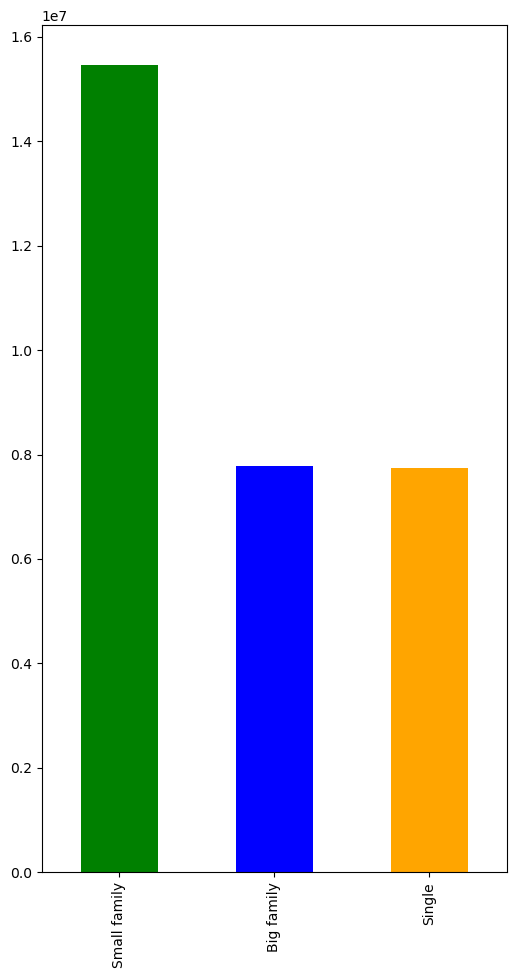

In [66]:
# Vis 1 family profile counts
dep_profile_bar=df_ord_prod_cus_dep['dep_profile'].value_counts().plot.bar(color = ['green','blue','orange'],figsize=(6,11))

In [67]:
#age and frequency of order

age_dow=pd.crosstab(df_ord_prod_cus_dep['Order_day_of_the_week'],df_ord_prod_cus_dep['age_profile'],dropna=False)

In [68]:
age_dow

age_profile,Middle age-adult,Old age-adult,Young-adult
Order_day_of_the_week,,,
0,2314182,2387673,1206755
1,2131241,2173396,1107049
2,1583184,1626130,815392
3,1438302,1490239,740994
4,1428293,1459633,737068
5,1583451,1627236,823042
6,1673373,1743991,873940


The below visualization shows us how different age group customers shop during the week. Saturday and sunday are the most busy days and tuesday and wednesday are least busy. Also middle and older adults shop more compared to young adults on the platform. 

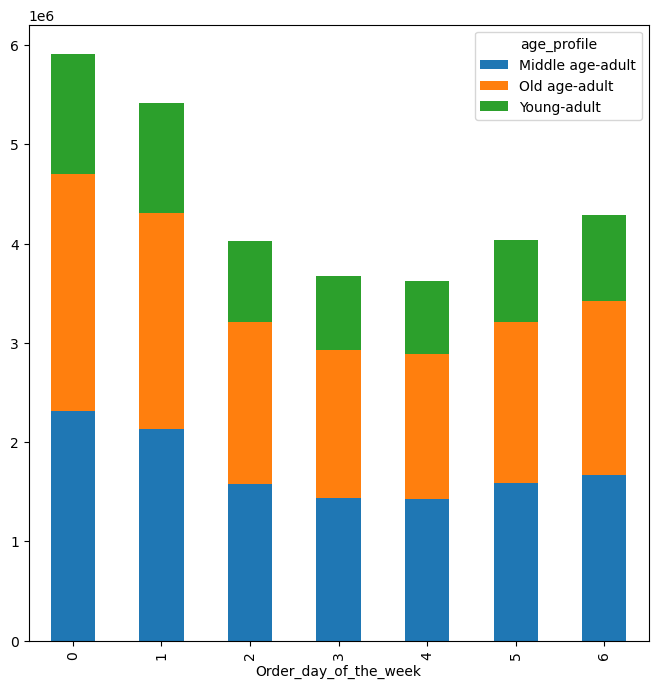

In [69]:
# vis 2 agewise shopping patters through the week

bar_age_dow = age_dow.plot(kind= 'bar', stacked = True , figsize=(8,8))

In [71]:
dep_order=pd.crosstab(df_ord_prod_cus_dep['loyalty_flag'],df_ord_prod_cus_dep['marital_status'],dropna=False)

In [72]:
dep_order

marital_status,divorced/widowed,living with parents and siblings,married,single
loyalty_flag,,,,
Loyal Customer,882722,492749,7202500,1706122
New Customer,403781,221779,3380651,797484
Regular Customer,1358768,766644,11160560,2590804


The below visualization helps us to understand that there are good number of regular customers and most of them have small family. These customers can be converted to loyal customers with good offers and deals with deparments they mostly shop in.

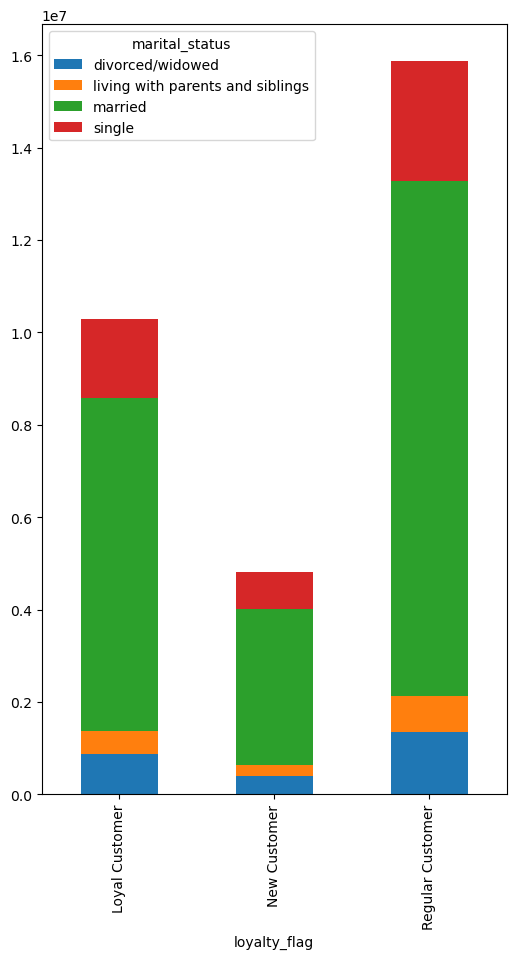

In [73]:
#vis 3 family profile and their loyalty
bar_dep_order = dep_order.plot(kind= 'bar', stacked = True ,figsize=(6,10) )

In [116]:
#Adding proportional chart here
mar_loyal = df_ord_prod_cus_dep.groupby('marital_status')['loyalty_flag'].value_counts(normalize=True)
mar_loyal = mar_loyal.mul(100).rename('Percent').reset_index()

In [117]:
mar_loyal

,marital_status,loyalty_flag,Percent
0,divorced/widowed,Regular Customer,51.365928
1,divorced/widowed,Loyal Customer,33.369814
2,divorced/widowed,New Customer,15.264258
3,living with parents and siblings,Regular Customer,51.759283
4,living with parents and siblings,Loyal Customer,33.267507
5,living with parents and siblings,New Customer,14.973210
6,married,Regular Customer,51.327761
7,married,Loyal Customer,33.124520
8,married,New Customer,15.547719
9,single,Regular Customer,50.855820


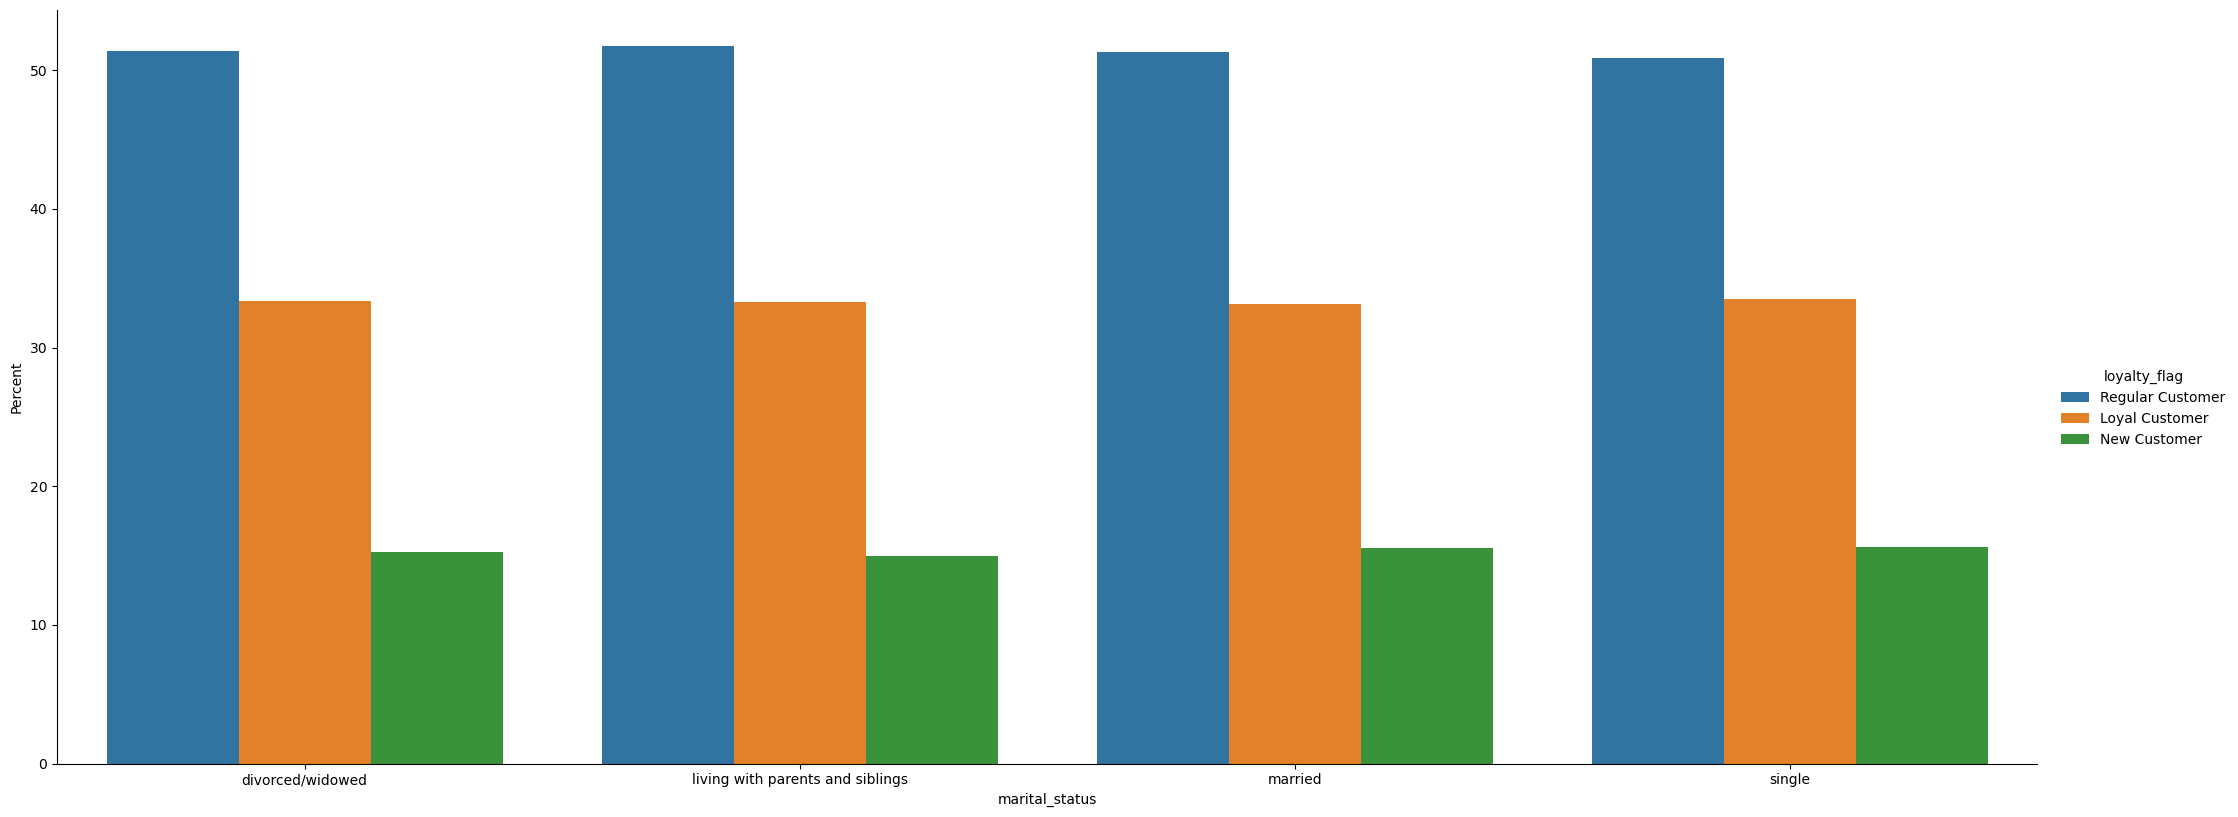

In [118]:
#vis 19
prop_mar_loyal = sns.catplot(x='marital_status', y='Percent',hue='loyalty_flag',kind='bar', data=mar_loyal, height=8.27, aspect=20.7/8.27)

In [74]:
prod_mar=pd.crosstab(df_ord_prod_cus_dep['department'],df_ord_prod_cus_dep['dep_profile'],dropna=False)

In [75]:
prod_mar

dep_profile,Big family,Single,Small family
department,,,
alcohol,37333,36827,70467
babies,102585,103328,204479
bakery,279822,281395,559611
beverages,640927,645341,1285633
breakfast,167322,166432,337096
bulk,8403,8000,17048
canned goods,255325,251020,505729
dairy eggs,1296264,1294376,2586542
deli,252592,253382,497860


The below representation helps to unders which products are sold by number of people in a hourse hold.
single- 1 person
samll family - household of 2-3 people
big family - household of more than 4 people


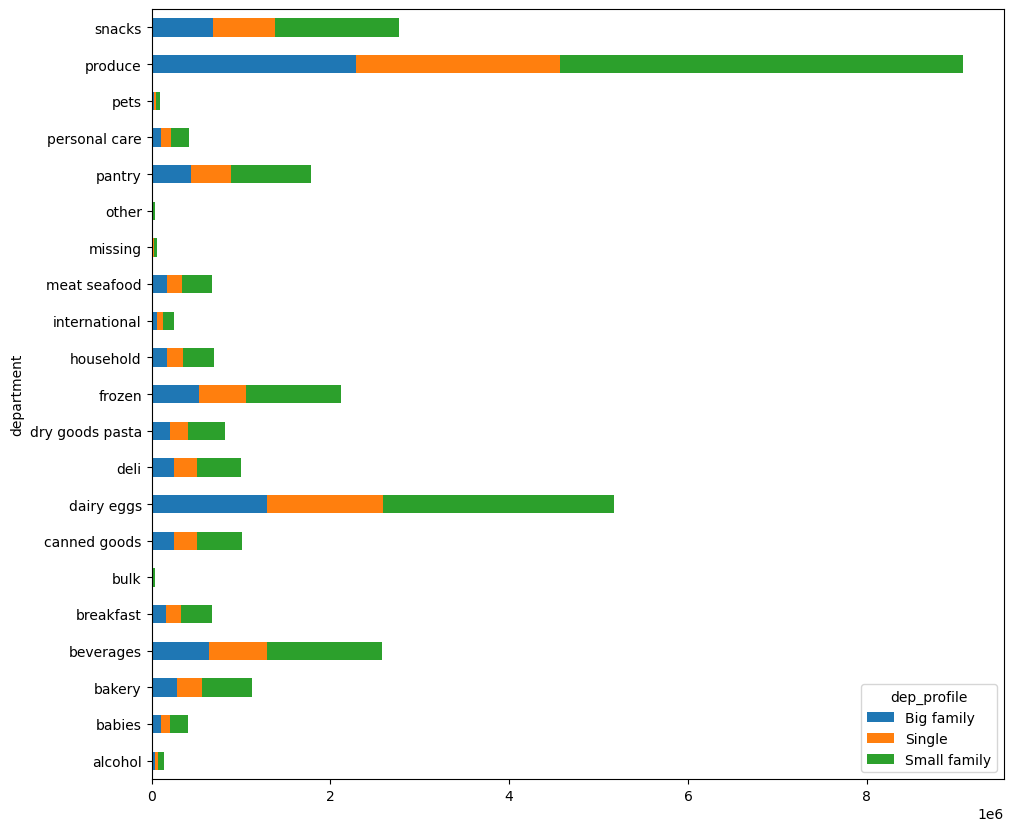

In [76]:
#vis 4 products to marital status
bar_prod_mar = prod_mar.plot(kind= 'barh', stacked = True,figsize=(11,10))

In [80]:
new_df = df_ord_prod_cus_dep.groupby('department')['dep_profile'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

In [98]:
new_df

,department,dep_profile,Percent
0,alcohol,Small family,48.723267
1,alcohol,Big family,25.813299
2,alcohol,Single,25.463434
3,babies,Small family,49.825289
4,babies,Single,25.177879
5,babies,Big family,24.996832
6,bakery,Small family,49.928357
7,bakery,Single,25.105993
8,bakery,Big family,24.965650
9,beverages,Small family,49.987655


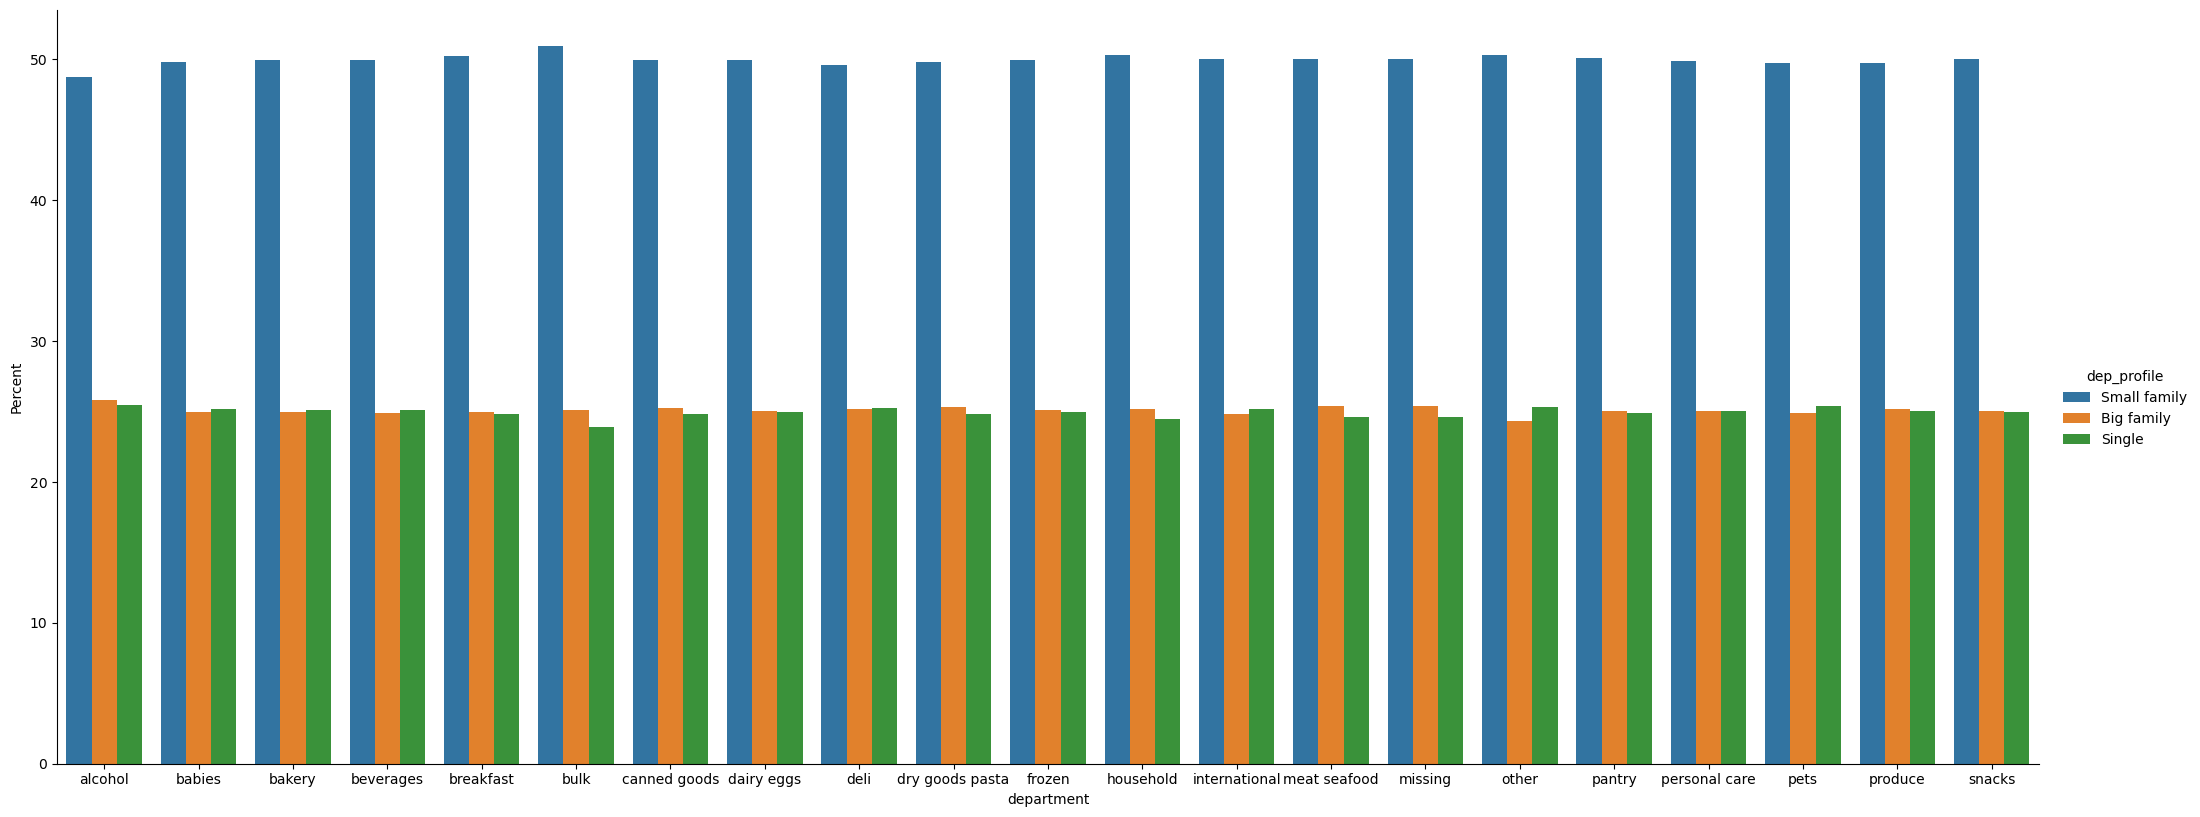

In [114]:
#vis 18
prop_prod_mar = sns.catplot(x='department', y='Percent',hue='dep_profile',kind='bar', data=new_df, height=8.27, aspect=20.7/8.27)

Below visualization shows the distribution of customers based on their incomes. clearly more low income(25-100 K) shops more on Instacart. 

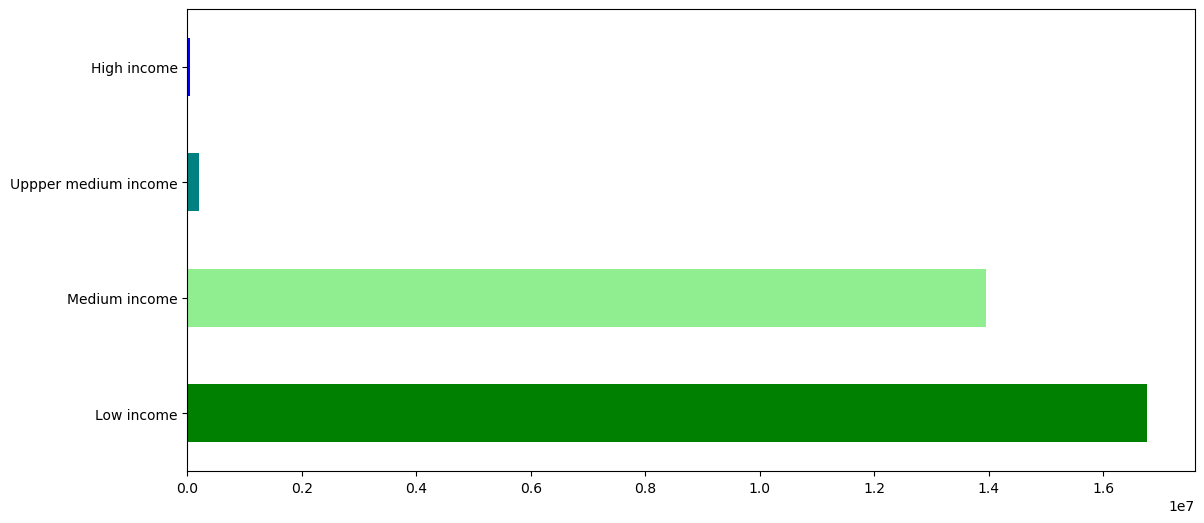

In [122]:
#vis 5 income profile customer numbers
bar_income = df_ord_prod_cus_dep['income_profile'].value_counts().plot.barh(color=['green','lightgreen','teal','blue'],figsize=(13,6))

In [123]:
prod_price=pd.crosstab(df_ord_prod_cus_dep['department'],df_ord_prod_cus_dep['price_range_loc'],dropna=False)

In [124]:
prod_price

price_range_loc,High-range product,Low-range product
department,,
alcohol,0,33046
babies,0,121484
bakery,0,274986
beverages,0,814697
breakfast,0,209185
bulk,0,1181
canned goods,0,281711
dairy eggs,4877,1370908
deli,0,299220


The below shows the price distribution amount different product groups. clearly most produts are low-range products. Meat and seafood section has the most high range products. We can clearly understand vegans dont buy  from high range products. as we saw two product department wise data, we understand that produce,dairy eggs, snacks and bevarages and frozen are the top 5 popular categories.

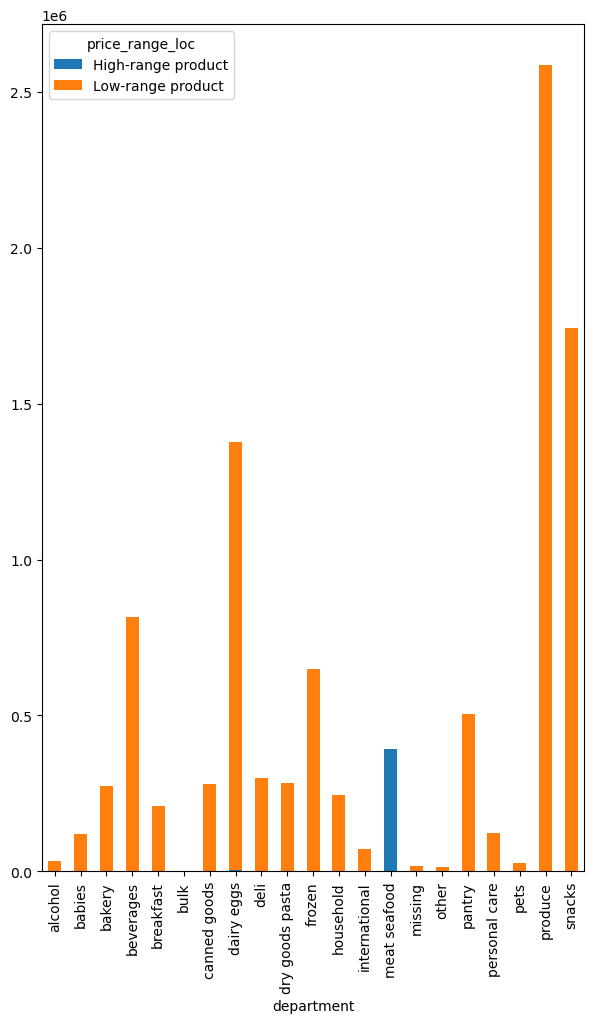

In [125]:
#vis 6 products and their price range
bar_dep_price = prod_price.plot(kind= 'bar', stacked = True,figsize=(7,11))

In [126]:
veg_spend=pd.crosstab(df_ord_prod_cus_dep['vegan_flag'],df_ord_prod_cus_dep['spend_flag'],dropna=False)

In [127]:
veg_spend

spend_flag,High Spender,Low Spender
vegan_flag,,
Non-Vegan,598020,30131599
Vegan,5405,229540


The presentation of vegan spending shows that vegans are low speders comparared to non-vegans. As produce is one of the highest sold product category, this can be used to encourage vegans to shop at instacart. may be adding more produce options, even using organiz produce can attract and encourage more spending on those categories.

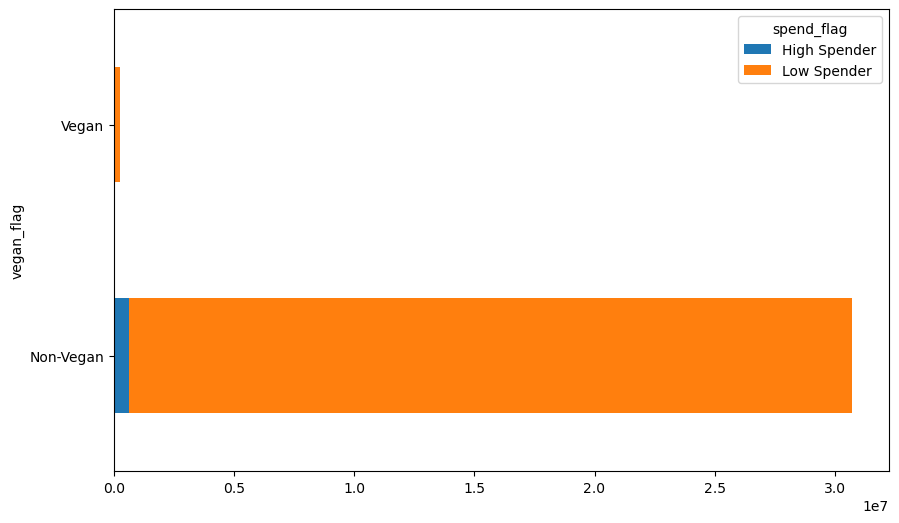

In [128]:
#vis 7 vegan flag and spending flag
bar_veg_spend = veg_spend.plot(kind= 'barh', stacked = True,figsize=(10,6))

Below pie chart shows distribution of loyal to new customers. There is an area of improvement to convert regular customer to loyal customers and give incentives like special offers to loyal customers to eep them as loyal custmers.

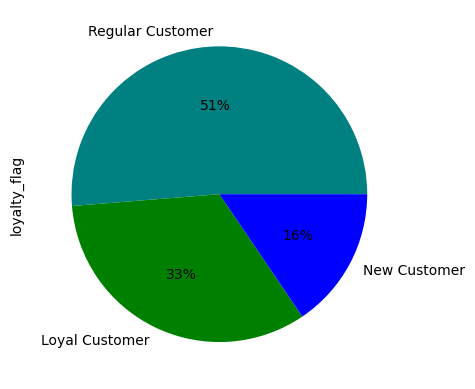

In [129]:
# vis 8 pie chart for loyal customer, Brand loyalty

loy_pie = df_ord_prod_cus_dep['loyalty_flag'].value_counts().plot.pie(autopct=('%1.f%%'),colors=['teal','green','blue'])


In [130]:
age_loyalty=pd.crosstab(df_ord_prod_cus_dep['age_profile'],df_ord_prod_cus_dep['loyalty_flag'],dropna=False)

In [131]:
age_loyalty

loyalty_flag,Loyal Customer,New Customer,Regular Customer
age_profile,,,
Middle age-adult,4052037,1867913,6232076
Old age-adult,4173086,1954188,6381024
Young-adult,2058970,981594,3263676


The visulaization shows the most loyal customers are middle and old aged and most regular cutomers are old age adults. 

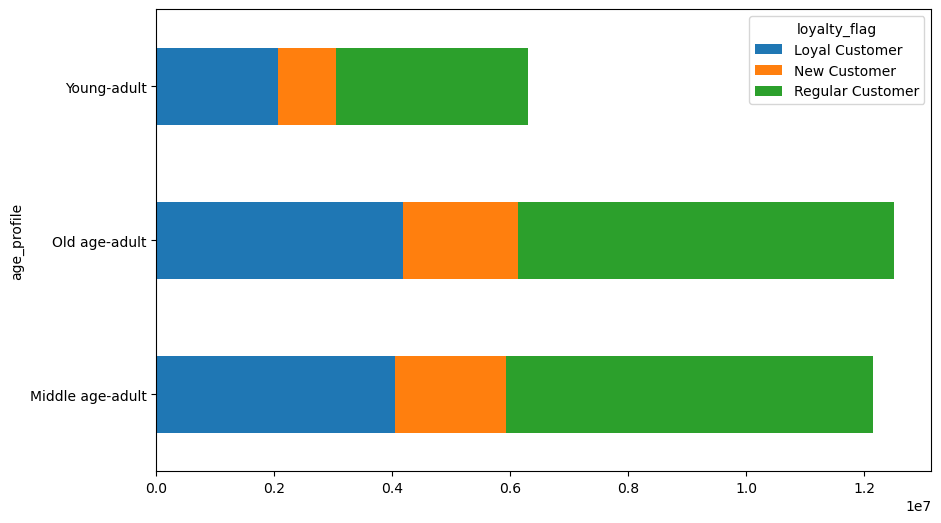

In [132]:
#vis 9 agewise loyal customers

bar_age_loyalty=age_loyalty.plot(kind= 'barh', stacked = True , figsize=(10,6) )

In [133]:
spend_hour=pd.crosstab(df_ord_prod_cus_dep['order_hour_of_day'],df_ord_prod_cus_dep['age_profile'],
                       values=df_ord_prod_cus_dep['prices'],aggfunc='sum').round(0)

In [134]:
spend_hour

age_profile,Middle age-adult,Old age-adult,Young-adult
order_hour_of_day,,,
0,646135.000000,643320.000000,335552.000000
1,338970.000000,340040.000000,176646.000000
2,197817.000000,206010.000000,108707.000000
3,146237.000000,156951.000000,78790.000000
4,146578.000000,168568.000000,82868.000000
5,246212.000000,277134.000000,137623.000000
6,847296.000000,886614.000000,463227.000000
7,2612978.000000,2771325.000000,1366279.000000
8,5087520.000000,5232889.000000,2602073.000000


The middle age and old age adults spends more compared to young age adults. old age adutlts spends more during early hours of the day compared other two.

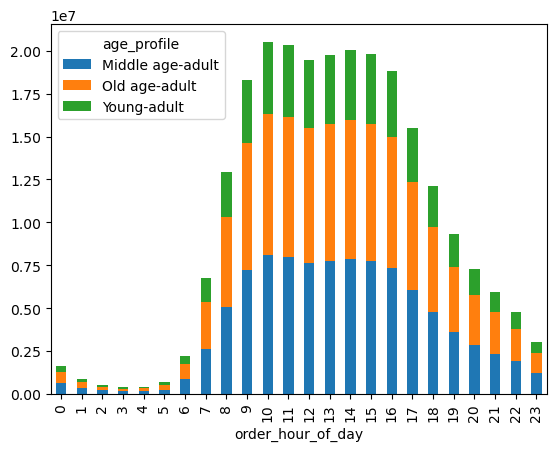

In [135]:
#vis 10 age profiles spending across the day

bar_spend_hour=spend_hour.plot(kind= 'bar', stacked = True)

#visualisation of marital status orders across different hours of the day

In [136]:
marital_hour_spend=pd.crosstab(df_ord_prod_cus_dep['order_hour_of_day'],df_ord_prod_cus_dep['marital_status'],
                       values=df_ord_prod_cus_dep['order_id'],aggfunc='count').round(0)

In [137]:
pd.set_option('float_format', '{:f}'.format)

In [138]:
marital_hour_spend

marital_status,divorced/widowed,living with parents and siblings,married,single
order_hour_of_day,,,,
0,16150,10657,145951,35284
1,8582,5556,77334,18149
2,6174,3489,45470,10558
3,4443,2536,33885,7932
4,3997,2794,35764,8208
5,7774,4337,58797,13510
6,23577,14866,195277,47293
7,77304,42229,600913,142767
8,142533,75827,1167336,273414


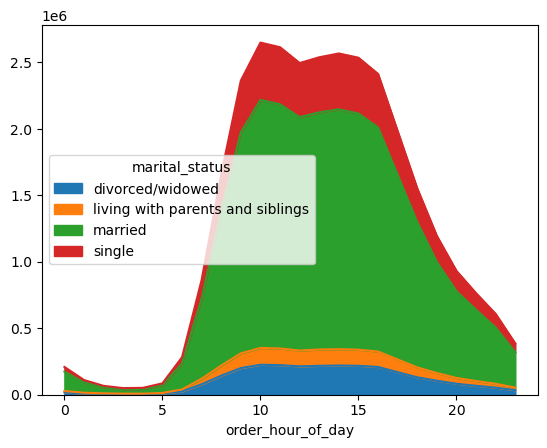

In [139]:
#vis 11 hourly orders by marital status and number of orders

bar_mar_hour_orders=marital_hour_spend.plot(kind= 'area', stacked = True,sort_columns=True)

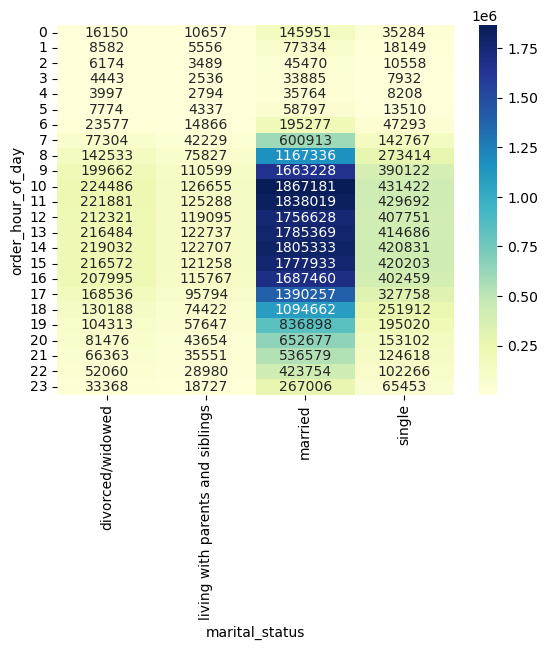

In [140]:
#vis 12 hourly orders by marital status and number of orders in heat map


heat_mar_hour_orders=sns.heatmap(marital_hour_spend,
            cmap="YlGnBu", annot=True, cbar=True, fmt=".0f")

## Question 7:
Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

order Frequency across profiles stats

In [141]:
#age categories and frequency

df_ord_prod_cus_dep.groupby('age_profile').agg({'days_since_prior_order':['mean','min', 'max']})

days_since_prior_order                   
                                   mean      min       max
age_profile                                               
Middle age-adult              10.598106 0.000000 30.000000
Old age-adult                 10.599909 0.000000 30.000000
Young-adult                   10.632680 0.000000 30.000000

In [142]:
#dependent profiles categories and frequency

df_ord_prod_cus_dep.groupby('dep_profile').agg({'days_since_prior_order':['mean','min', 'max']})

days_since_prior_order                   
                               mean      min       max
dep_profile                                           
Big family                10.612427 0.000000 30.000000
Single                    10.588728 0.000000 30.000000
Small family              10.611165 0.000000 30.000000

In [143]:
#vegan status and frequency

df_ord_prod_cus_dep.groupby('vegan_flag').agg({'days_since_prior_order':['mean','min', 'max']})

days_since_prior_order                   
                             mean      min       max
vegan_flag                                          
Non-Vegan               10.584465 0.000000 30.000000
Vegan                   13.405989 0.000000 30.000000

In [144]:
#income profiles categories and frequency

df_ord_prod_cus_dep.groupby('income_profile').agg({'days_since_prior_order':['mean','min', 'max']})

days_since_prior_order                   
                                       mean      min       max
income_profile                                                
High income                       10.152353 0.000000 30.000000
Low income                        10.637113 0.000000 30.000000
Medium income                     10.580119 0.000000 30.000000
Uppper medium income               9.916296 0.000000 30.000000

Spending across profiles stats

In [145]:
#age profiles and spending stats

df_ord_prod_cus_dep.groupby(['age_profile']).agg({'prices':['mean','min', 'max','sum']})

prices                                   
                     mean      min       max             sum
age_profile                                                 
Middle age-adult 7.789995 1.000000 25.000000 94649986.100000
Old age-adult    7.795802 1.000000 25.000000 97496524.400000
Young-adult      7.781398 1.000000 25.000000 49047725.100000

In [146]:
#dependent profiles and spending stats

df_ord_prod_cus_dep.groupby(['dep_profile']).agg({'prices':['mean','min', 'max','sum']})

prices                                    
                 mean      min       max              sum
dep_profile                                              
Big family   7.792886 1.000000 25.000000  60560925.500000
Single       7.789550 1.000000 25.000000  60279492.700000
Small family 7.789957 1.000000 25.000000 120353817.400000

In [147]:
#vegan profiles and  spending stats

df_ord_prod_cus_dep.groupby(['vegan_flag']).agg({'prices':['mean','min', 'max','sum']})

prices                                    
               mean      min       max              sum
vegan_flag                                             
Non-Vegan  7.797059 1.000000 25.000000 239562632.900000
Vegan      6.944616 1.000000 20.000000   1631602.700000

In [148]:
#income profiles and spending stats

df_ord_prod_cus_dep.groupby(['income_profile']).agg({'prices':['mean','min', 'max','sum']})

prices                                    
                         mean      min       max              sum
income_profile                                                   
High income          7.738014 1.000000 25.000000    360212.300000
Low income           7.652571 1.000000 25.000000 128236219.000000
Medium income        7.956613 1.000000 25.000000 111001294.600000
Uppper medium income 7.786333 1.000000 25.000000   1596509.700000

Question 8:
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

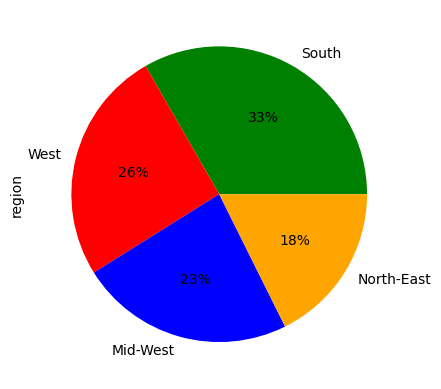

In [149]:
#vis 16 customer distribution in pie

region_count_pie = df_ord_prod_cus_dep['region'].value_counts().plot.pie(autopct=('%1.f%%'),colors=['green','red','blue','orange'])


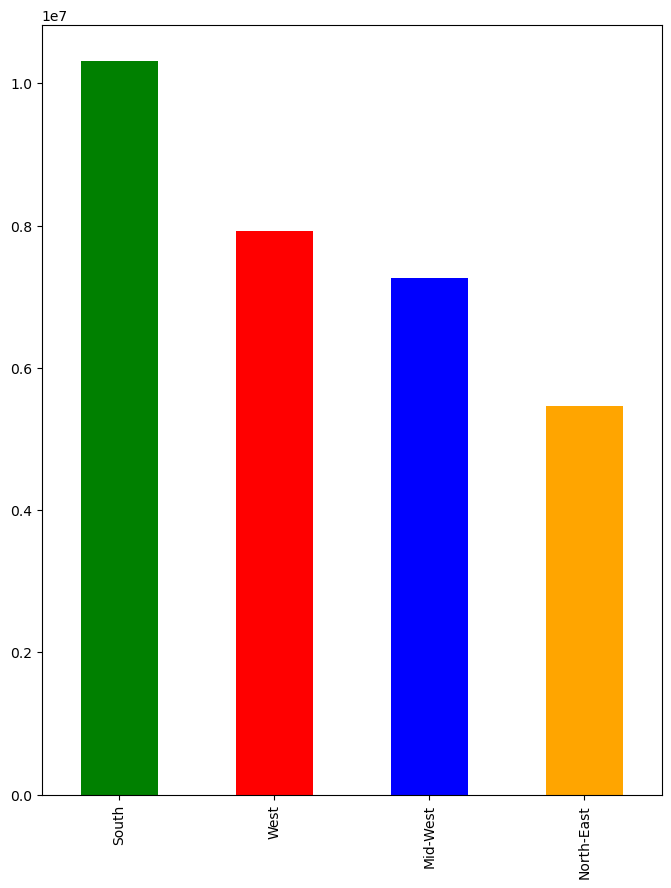

In [150]:
#vis 13 customer headcounts across regions

region_bar=df_ord_prod_cus_dep['region'].value_counts().plot.bar(color = ['green','red','blue','orange'], figsize=(8,10))

In [151]:
reg_dep=pd.crosstab(df_ord_prod_cus_dep['department'],df_ord_prod_cus_dep['region'],dropna=False)

In [152]:
reg_dep

region,Mid-West,North-East,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


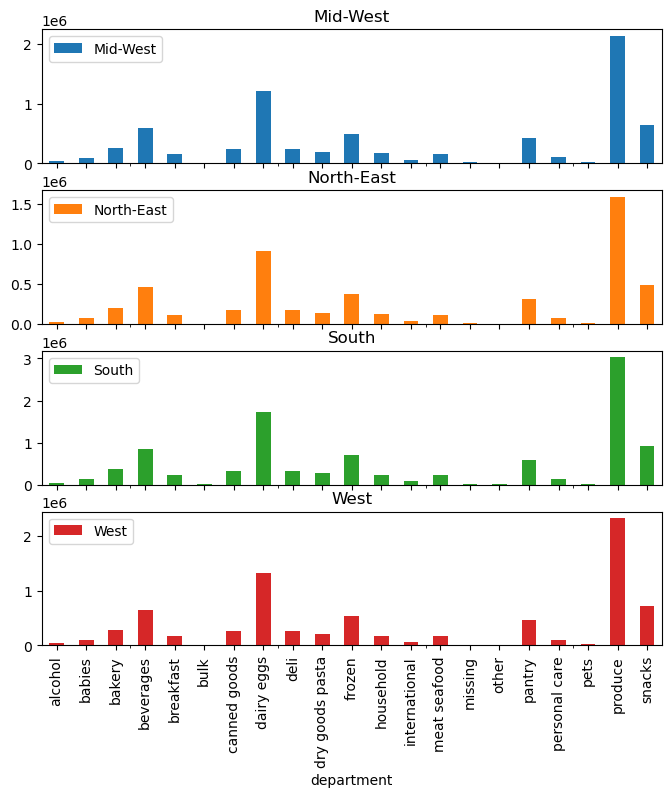

In [153]:
#vis 14 chart to represent orders across regions in different departments

bar_reg_dep=reg_dep.plot(kind= 'bar',subplots=True, stacked = True,sort_columns=True, figsize=(8,8))

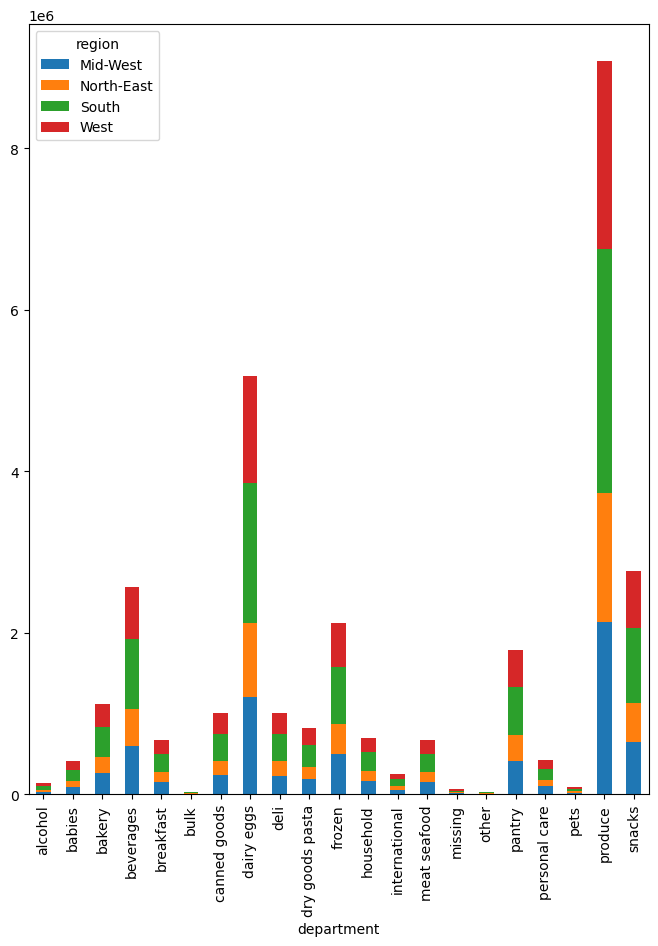

In [154]:
# vis 15 same chart as about together

bar_reg_dep_tog=reg_dep.plot(kind= 'bar', stacked = True,sort_columns=True, 
                         figsize=(8,10))

In [155]:
reg_dep_percentage=pd.crosstab(df_ord_prod_cus_dep['department'],df_ord_prod_cus_dep['region'],dropna=False,normalize='index').round(3)*100

In [156]:
pd.set_option('float_format', '{:f}'.format)

This crosstab has calculated each region order stats scross departments in percentage.

In [157]:
reg_dep_percentage

region,Mid-West,North-East,South,West
department,,,,
alcohol,23.500000,17.300000,33.800000,25.400000
babies,23.300000,17.700000,34.000000,25.000000
bakery,23.400000,17.800000,33.200000,25.700000
beverages,23.300000,18.000000,33.400000,25.300000
breakfast,23.300000,17.600000,33.300000,25.900000
bulk,23.700000,16.700000,33.400000,26.100000
canned goods,23.500000,17.500000,33.300000,25.700000
dairy eggs,23.400000,17.700000,33.300000,25.600000
deli,23.400000,17.800000,33.200000,25.600000


In [158]:
region_prodcuts = df_ord_prod_cus_dep.groupby('department')['region'].value_counts(normalize=True)
region_prodcuts = region_prodcuts.mul(100).rename('Percent_reg').reset_index()

In [159]:
region_prodcuts

,department,region,Percent_reg
0,alcohol,South,33.750959
1,alcohol,West,25.412959
2,alcohol,Mid-West,23.538482
3,alcohol,North-East,17.297600
4,babies,South,33.994571
5,babies,West,24.958576
6,babies,Mid-West,23.329158
7,babies,North-East,17.717694
8,bakery,South,33.155845
9,bakery,West,25.709119


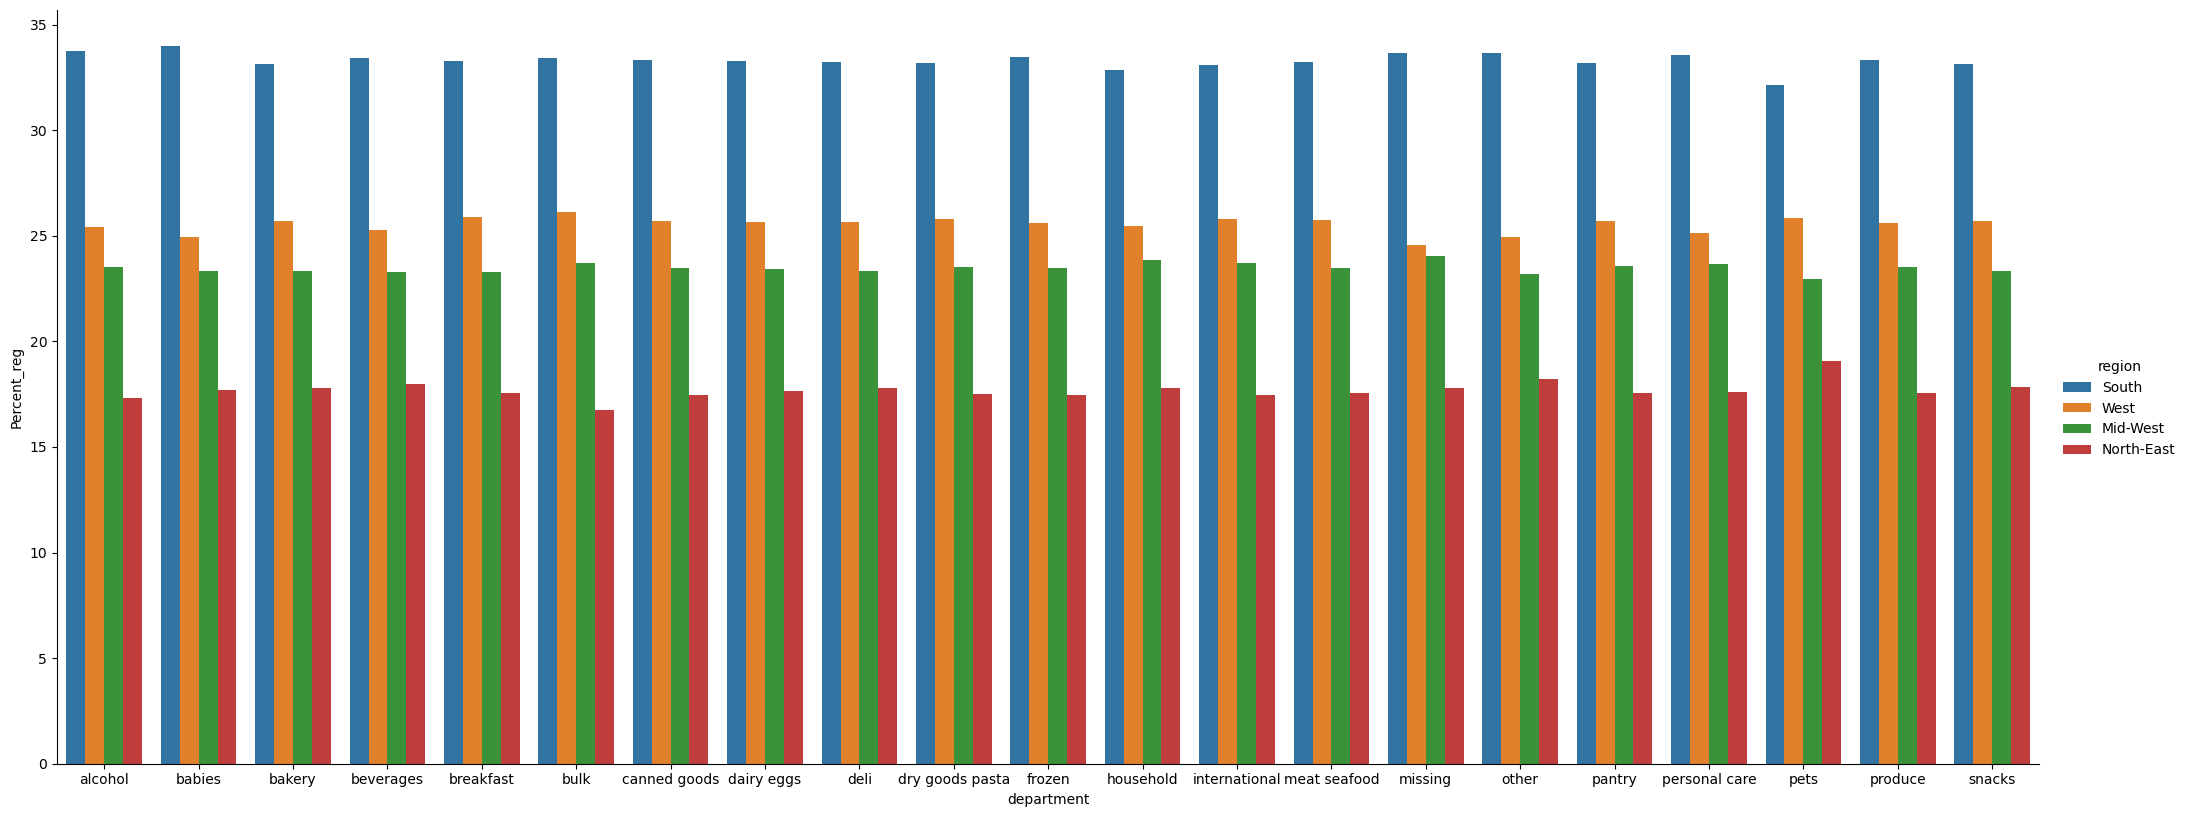

In [160]:
#vis 20
prop_region_prodcuts = sns.catplot(x='department', y='Percent_reg',hue='region',kind='bar', data=region_prodcuts, height=8.27, aspect=20.7/8.27)

The customer count from high to low : South, west , med-west , north- east
The department wise product orders also reflect similar trend. 
I have calcaulted percentages for better idea of sales across region.

# Exporting visualizations and data

In [161]:
pathv=r'/Users/keerthiputti/Desktop/Data Analysis/Instacart Basket Analysis-Python/04 Analysis/Visulization'

In [280]:
#vis 1
dep_profile_bar.figure.savefig(os.path.join(pathv,'dependent_profile_bar.png'))

In [190]:
#vis 2
bar_age_dow.figure.savefig(os.path.join(pathv,'age_profile_day_week_bar.png'))

In [272]:
#vis 3
bar_dep_order.figure.savefig(os.path.join(pathv,'dependent_profile_orders_bar.png'))

In [278]:
#vis 4
bar_prod_mar.figure.savefig(os.path.join(pathv,'maritalstatus_products_bar.png'))

In [294]:
#vis 5
bar_income.figure.savefig(os.path.join(pathv,'income_customer_bar.png'))

In [299]:
#vis 6
bar_dep_price.figure.savefig(os.path.join(pathv,'department_price_bar.png'))

In [300]:
#vis 7
bar_veg_spend.figure.savefig(os.path.join(pathv,'vegan_spend_bar.png'))

In [198]:
#vis 8
loy_pie.figure.savefig(os.path.join(pathv,'loyal_customer_pie.png'))

In [267]:
#vis 9
bar_age_loyalty.figure.savefig(os.path.join(pathv,'age_toloyalty_bar.png'))

In [200]:
#vis 10
bar_spend_hour.figure.savefig(os.path.join(pathv,'spending_hours_bar.png'))

In [201]:
#vis 11
bar_mar_hour_orders.figure.savefig(os.path.join(pathv,'marital_order_hours.png'))

In [202]:
#vis 12
heat_mar_hour_orders.figure.savefig(os.path.join(pathv,'marital_order_hours_heatmap.png'))

In [256]:
#vis 13
region_bar.figure.savefig(os.path.join(pathv,'region_cust_count_bar.png'))

In [ ]:
#vis 14 , I couldnot find way to save it

# bar_reg_dep.figure.savefig(os.path.join(pathv,'department_regional_bar.png'))


In [252]:
#vis 15
bar_reg_dep_tog.figure.savefig(os.path.join(pathv,'reg_dep_bar.png'))

In [261]:
#vis 16
region_count_pie.figure.savefig(os.path.join(pathv,'reg_count_pie.png'))

In [162]:
#vis 18
prop_mar_loyal.figure.savefig(os.path.join(pathv,'mar_loy_propbar.png'))

In [164]:
#vis 19
prop_prod_mar.figure.savefig(os.path.join(pathv,'dep_nbr_prod_prop_bar.png'))

In [165]:
#vis 20
prop_region_prodcuts.figure.savefig(os.path.join(pathv,'reg_prod_prop_bar.png'))

In [166]:
df_ord_prod_cus_dep.columns

Index(['order_id', 'user_id', 'order_number', 'Order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'averge_price',
       'spend_flag', 'order_frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'dependents_nbr', 'marital_status', 'income',
       'region', 'activity_flag', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'age_profile', 'income_profile', 'dep_profile',
       'department', '_merge', 'animal_product_flag', 'veg_nonv_flag',
       'vegan_flag'],
      dtype='object')

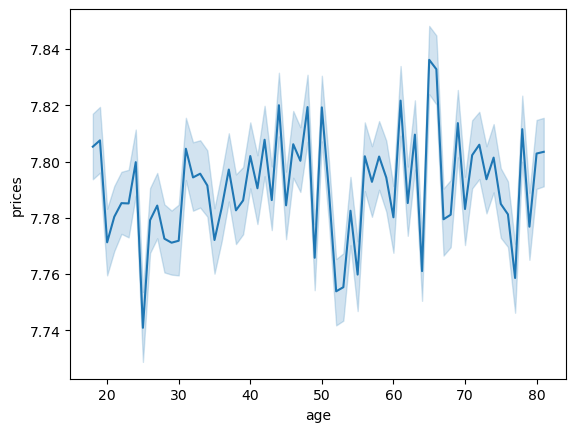

In [262]:
line_age_price=sns.lineplot(data=df_ord_prod_cus_dep,x='age',y='prices')

In [264]:
#vis 17

line_age_price.figure.savefig(os.path.join(pathv,'age_price_line.png'))

In [167]:
#to check which products are bought mostly at different times of the day

prod_hour=pd.crosstab(df_ord_prod_cus_dep['department'],df_ord_prod_cus_dep['order_hour_of_day'],dropna=False)

In [305]:
prod_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
department,,,,,,,,,,,,,,,,,,,,,
alcohol,465,293,246,177,175,260,645,2021,5046,9831,...,14140,14263,13455,11328,8251,5467,3149,1819,1318,822
babies,2317,1085,616,457,534,1076,4794,16310,28008,33483,...,33184,31893,29107,22527,18003,15517,15492,14333,10177,5233
bakery,6958,3576,2282,1734,1824,2967,10415,33029,61396,85519,...,93485,93399,89367,73258,56552,42816,32517,26037,20293,12822
beverages,16652,9518,5890,4468,4584,7108,22202,66553,135182,211187,...,211658,208913,200128,166305,131501,100235,72229,53367,41463,28520
breakfast,4131,2218,1318,1008,1059,1797,6546,20865,39506,56273,...,53593,52700,51052,41556,33012,26175,20456,16711,12859,8219
bulk,231,114,66,49,46,75,314,889,1779,2669,...,2672,2754,2491,2041,1582,1276,1112,924,706,490
canned goods,6797,3655,2254,1621,1738,2742,8619,25924,50974,72362,...,86670,84703,79069,63720,48226,37351,29403,25345,20506,12650
dairy eggs,33150,16828,10162,7671,7748,13778,49797,154902,296832,414409,...,422958,417052,397878,323889,254759,196906,156345,129258,101496,63436
deli,6573,3478,2142,1537,1578,2659,8667,26410,51248,73840,...,83515,83599,81195,67579,52346,39110,29143,23430,19058,12292


In [168]:
#frequent order categories

df_ord_prod_cus_dep.groupby(['department']).agg({'reordered':['mean']}).sort_index()

,reordered
,mean
department,
alcohol,0.590166
babies,0.591220
bakery,0.644934
beverages,0.669548
breakfast,0.577357
bulk,0.589788
canned goods,0.473826
dairy eggs,0.686309


In [169]:
#loyalty to spending

loy_fre=pd.crosstab(df_ord_prod_cus_dep['loyalty_flag'],df_ord_prod_cus_dep['Order_day_of_the_week'],dropna=False)

In [170]:
loy_fre

Order_day_of_the_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal Customer,1754731,1843401,1352343,1266495,1292042,1456715,1318366
New Customer,984879,818902,625288,560418,535931,587718,690559
Regular Customer,3169000,2749383,2047075,1842622,1797021,1989296,2282379


In [171]:
df_ord_prod_cus_dep.groupby(['age_profile','dependents_nbr']).agg({'order_id':['count']})

order_id
                                   count
age_profile      dependents_nbr         
Middle age-adult 0               3021060
                 1               3066437
                 2               3021512
                 3               3043017
Old age-adult    0               3145249
                 1               3077661
                 2               3147040
                 3               3138348
Young-adult      0               1573372
                 1               1575008
                 2               1564709
                 3               1591151

In [172]:
#exporting the data

df_ord_prod_cus_dep.to_pickle(os.path.join(pathk,'Prepared Data','Orders_products_customer_depart.pkl'))